## Still not NLP, but some modeling

The purpose of this is to shed light on the jokes data we have retrieved. 
Trump is a popular butt end of a joke on /r/Jokes. Are there any patterns in this? Doest the election have any result on his un-popularity? 

And answer to many more quesitons. 
-- any other event that makes people hate trump
-- how quickly do people gain/lose intersting in trump bashing
-- etc. etc. 

## Data import and pre-process

In [15]:
import pandas as pd
df = pd.read_csv('./jokes_score_name_clean.csv')

In [16]:
name_list = ["hilary", "clinton", "obama", "bush", "trump", "biden", "cheney", "ajit", "mccain", "palin"]
df.sample(5)

,Unnamed: 0,id,score,q,a,timestamp,name,hilary,clinton,obama,bush,trump,biden,cheney,ajit,mccain,palin
69808,69822,5i3cbe,24,Selling a dead bird,Not going cheep,1.481633e+09,Ibrahhhhh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121640,121657,7e0tgh,212,I hope I never meet Frank,Every time someone tries to be Frank with me t...,1.511101e+09,Electricboogalou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65203,65217,5ci2mj,10,What do you call a promise you can't keep?,A campaign promise.,1.478913e+09,NicCage4life,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15992,16001,3f1t0p,5,How many people does it take to screw in a lig...,"Only two, but either they'd have to be really ...",1.438190e+09,metagloria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130108,130125,7sc4c1,70,How do you spot a blind guy on a nude beach?,It isn't hard.,1.516684e+09,gmb263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from datetime import datetime, date
import time
def toDateStr(t):
    s = datetime.fromtimestamp(t)
    return s.strftime('%Y-%m-%d')

def timeToStamp(s):
    return time.mktime(s.timetuple())

In [17]:
df.sort_index='timestamp'

In [19]:
df.sort_values(by='timestamp', inplace=True)

In [28]:
dflen = len(df.index)
currtotal = 0
totals = []
for i in range(dflen):
    row = df.iloc[i]
    currtotal = currtotal +row.score
    totals.append(currtotal)

The reason why we're adding all the scores together is that this is a dumb way to do integration. 
ideally, we want to know how many posts/score about trumps are posted per hour/day, but the data is far from smooth. 
Thus, the poopr person's integration. 

In [30]:
df['sum_score'] = totals 

we're also taking advantage of the matplotlib's plot_date function, so that the x axis is labeled nicely for us. 

In [31]:
df['date'] = df['timestamp'].apply(datetime.fromtimestamp)

# Experiment 1: poke around, see what happens

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Preliminary look: We started making way more fun of Trump after the election, Nov. 8th, 2016
### The inflection point is pretty fucking hard to miss. 

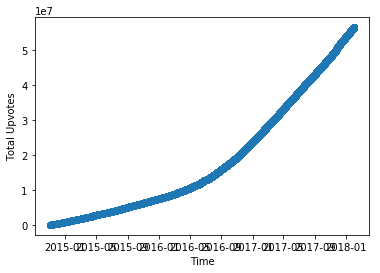

In [57]:
plt.clf()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Total Upvotes')
plt.plot_date(df['date'], df['sum_score'])
plt.show()

## Take a closer look to the election day
### a clear "jump" on Nov. 8th, 2016

In [45]:
def getDFRange(start_date, end_date):
    return df[(df['timestamp']>= timeToStamp(start_date)) 
                  & (df['timestamp']< timeToStamp(end_date))]

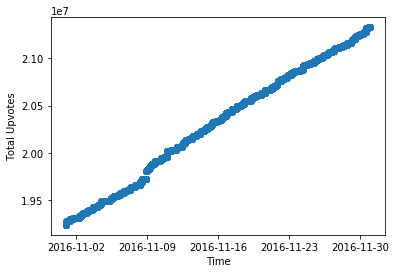

In [60]:
start_date = date(2016, 11, 1)
end_date = date(2016, 12,1)
plt.clf()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Total Upvotes')
df_range = getDFRange(start_date, end_date)
plt.plot_date(df_range['date'], df_range['sum_score'])
plt.show()

## But closer observation renders the data discontinuous. 
... one educated guess is that Reddit derped upon the huge input of jokes, so only update /r/Jokes page(subreddit) every n minutes. 

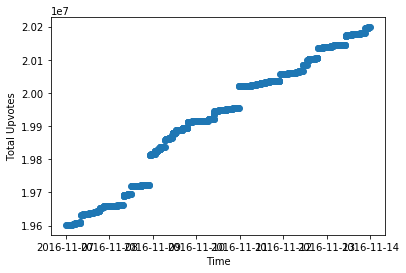

In [64]:
start_date = date(2016, 11, 7)
end_date = date(2016, 11,14)
plt.clf()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Total Upvotes')
df_range = getDFRange(start_date, end_date)
plt.plot_date(df_range['date'], df_range['sum_score'])
plt.show()

### this calls for a more sophisticated way to look at the data. 

# Experiment 2: binning the data per hour

### getting the trump related joke upvotes per hour and per day

In [68]:
from datetime import timedelta, date

def hourrange(start_date, end_date):
    for n in range(int ((end_date - start_date).days*24)):
        start_of_day = (start_date + timedelta(n))
        yield time.mktime(start_of_day.timetuple())

start_date = date(2016, 1, 1)
end_date = date(2018, 1, 1)
hour_list = []

for single_date in hourrange(start_date, end_date):
    hour_list.append(single_date)

trump_data_perhour = []
for i in range(len(hour_list)-1):
    starttime = hour_list[i]
    endtime = hour_list[i+1]
    day_df = df[(df['timestamp']>= starttime) & (df['timestamp'] <endtime)]
    count = day_df[day_df['trump']>0]['score'].sum()
    trump_data_perhour.append([starttime, count])


Getting the data within the timeframe of intest

In [69]:
def getDateRangeData(data, start_date, end_date):
    start_timestamp = time.mktime(start_date.timetuple())
    end_timestamp = time.mktime(end_date.timetuple())
    
    new_x = []
    new_y = []
    for d in data: 
        if (d[0] >= start_timestamp) & (d[0]<end_timestamp):
            new_x.append(datetime.fromtimestamp(d[0]))
            new_y = new_y + [d[1]]
            #print(d)
    return new_x, new_y

In [174]:
start_date = date(2016, 10, 1)
end_date = date(2017, 1, 1)

newx, newy = getDateRangeData(trump_data_perhour, start_date, end_date)
sumy = []
curry = newy[0]
for y in newy:
    sumy.append(curry)
    curry = curry + y

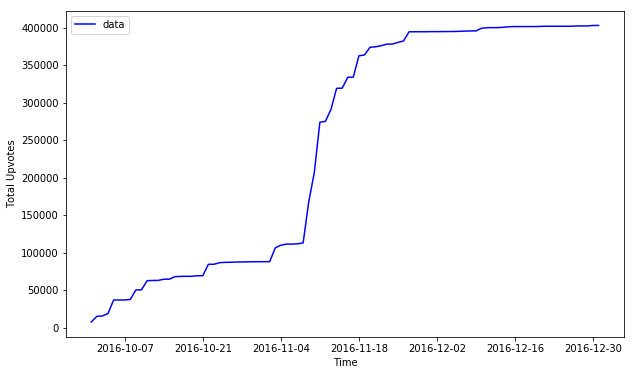

In [175]:
plt.figure(figsize=(10,6))
plt.plot_date(newx, sumy, 'b-', label='data')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Total Upvotes')
plt.show()

... Oh, my. What do we see here? 
## A growth Curve! (around election day).
This is a very classical growth curve that's used to model many many things, from growth of bacteria to that of cancer. 
COOL! Now we can model the growth of Trump jokes as if it were cancer!

# Experiment 3: Magify! Choose model! Fit Curve!

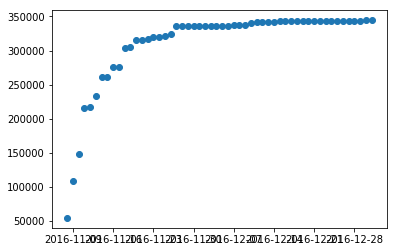

In [187]:
start_date = date(2016, 11, 8)
end_date = date(2017, 1, 1)

newx, newy = getDateRangeData(trump_data_perhour, start_date, end_date)
sumy = []
curry = newy[0]
for y in newy:
    sumy.append(curry)
    curry = curry + y
plt.plot_date(newx, sumy)
plt.show()

## Model: Generalized Logistic Function, with constant growth
Hum, what else does this curve remind you of? 
Hint: deep learning? 
Answer: Sigmoid! 
Because it is but just a generalized function of sigmoid, a close cousin. 


In [188]:
# "normalize" the timestamp a bit, so it's easier to deal with. 
xdata = [timeToStamp(x)/1e9 for x in newx]
ydata = sumy

In [189]:
# Generalised logistic function
def growth_func(x, a, k,c,q,b, v):
    return a +(k/np.power((c + q*np.exp(b*x)), v))

fit curve and find coefficients: 
 p0=[  9.88700433e+05,  -1.62777400e+00,  -1.02823909e+00,
         4.65014791e-01,   5.36906321e-01,   1.65061719e+00]

In [190]:
popt, pcov = curve_fit(growth_func, xdata, ydata, 
                       p0=np.array([  9.88700433e+05,  -1.62777400e+00,  -1.02823909e+00, 4.65014791e-01,   5.36906321e-01,   1.65061719e+00]),
                       maxfev=10000)
print("a, l, k, c, q, b, v: ", popt) 

a, l, k, c, q, b, v:  [  3.45814289e+05  -3.16163262e-06  -1.02811219e+00   4.65071816e-01
   5.36987655e-01   3.48386303e+00]


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


## ... if this is not a perfect fucking fit, I don' tknow what is

...but I also did have 7 parameters, so over fitting is entirely possible. 

In [191]:
#map(lambda x: datetime.fromtimestamp(x*1e9), xdata)

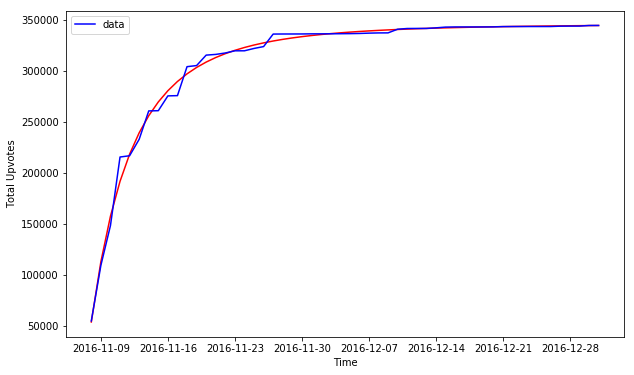

In [192]:
ys = [growth_func(*np.insert(popt, 0, d)) for d in xdata]
plt.figure(figsize=(10,6))
plt.plot_date(newx, ys, 'r-')
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, aa=%5.3f, bb=%5.3f' % tuple(popt))
plt.plot_date(newx, ydata, 'b-', label='data')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Total Upvotes')
plt.show()

## intepretation of parameters: 

### Growth Rate = 0.54

# Experiment 4: how does it fit across a larger time frame? 

In [202]:
start_date = date(2016, 11, 8)
end_date = date(2017, 5, 8)

extended_newx, extended_newy = getDateRangeData(trump_data_perhour, start_date, end_date)
extended_sumy = []
curry = extended_newy[0]
for y in extended_newy:
    extended_sumy.append(curry)
    curry = curry + y

extended_xdata = [timeToStamp(x)/1e9 for x in extended_newx]
extended_ydata = extended_sumy

In [203]:
extended_ys = [growth_func(*np.insert(popt, 0, d)) for d in extended_xdata]

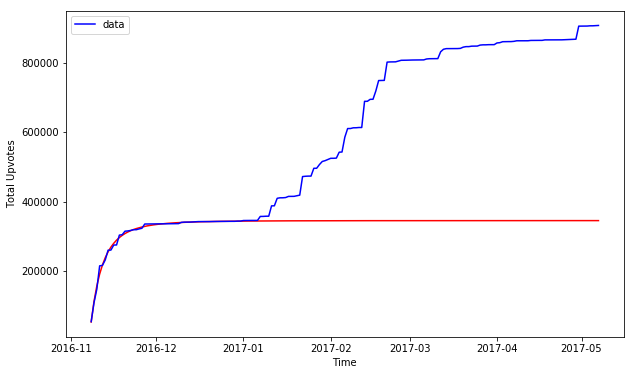

In [204]:
plt.figure(figsize=(10,6))
plt.plot_date(extended_newx, extended_ys, 'r-')
#         label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, aa=%5.3f, bb=%5.3f' % tuple(popt))
plt.plot_date(extended_newx, extended_ydata, 'b-', label='data')
plt.legend()
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Time')
plt.ylabel('Total Upvotes')
plt.show()

# You see that point where the curve stopped fitting? 
# Yep, that's the travel ban. 